In [2]:
import pandas as pd
import numpy as np

In [3]:
#import in tsv
ad_df = pd.read_csv('AD_snp_associations.tsv', sep = "\t")

In [10]:
import pandas as pd
dep_df = pd.read_csv('depression_gwas.tsv', sep = "\t")
sig_dep = dep_df[dep_df['pValue'] < 5e-08]

dep_snps_df = sig_dep[['riskAllele']].copy()
dep_snps_df['snp'] = dep_snps_df['riskAllele'].str.split("-").str[0]
dep_snps = dep_snps_df.drop('riskAllele', axis = 1)

dep_snps.shape

(2549, 1)

In [9]:
dep_snps.to_csv('depression_snps.txt', index = None, header = None)

In [5]:
ad_df.head()

,riskAllele,pValue,pValueAnnotation,riskFrequency,orValue,beta,ci,mappedGenes,traitName,efoTraits,bgTraits,accessionId,locations,pubmedId,author
0,rs1060743-?,5.000000e-08,-,NR,1.1066935,-,-,BIN1,Alzheimer's disease (late onset),late-onset Alzheimers disease,-,GCST005549,2:127068957,28714976,Sims R
1,rs1532278-?,6.000000e-10,-,NR,1.1177499,-,-,CLU,Alzheimer's disease (late onset),late-onset Alzheimers disease,-,GCST005549,8:27608798,28714976,Sims R
2,rs3865444-?,2.000000e-06,-,NR,1.0942049,-,-,"SIGLEC22P,CD33",Alzheimer's disease (late onset),late-onset Alzheimers disease,-,GCST005549,19:51224706,28714976,Sims R
3,rs6656401-?,7.000000e-11,-,NR,1.1725225,-,-,CR1,Alzheimer's disease (late onset),late-onset Alzheimers disease,-,GCST005549,1:207518704,28714976,Sims R
4,rs7232-?,6.000000e-07,-,NR,1.0942651,-,-,MS4A6A,Alzheimer's disease (late onset),late-onset Alzheimers disease,-,GCST005549,11:60173126,28714976,Sims R


In [ ]:
# comparing depression and AD SNPs
sig_AD = ad_df[ad_df['pValue'] < 5e-08]
sig_dep = dep_df[dep_df['pValue'] < 5e-08]

#ascending order
sig_AD = sig_AD.sort_values(by = "pValue")
sig_dep = sig_dep.sort_values(by = "pValue")

# grab snps with associated gene names
AD_snps_df = sig_AD[['riskAllele', 'mappedGenes']].copy()
AD_snps_df['snp'] = AD_snps_df['riskAllele'].str.split("-").str[0]
AD_snps = AD_snps_df.drop('riskAllele', axis = 1)

dep_snps_df = sig_dep[['riskAllele', 'mappedGenes']].copy()
dep_snps_df['snp'] = dep_snps_df['riskAllele'].str.split("-").str[0]
dep_snps = dep_snps_df.drop('riskAllele', axis = 1)

overlap_snps = set(AD_snps['snp']).intersection(dep_snps['snp'])
print(f"Number of overlapping SNPs: {len(overlap_snps)}")
print(list(overlap_snps)[:10])  # show first 10 overlaps

# Show associated genes for overlapping SNPs
AD_snps[AD_snps['snp'].isin(overlap_snps)][['snp', 'mappedGenes']]




Number of overlapping SNPs: 3
['rs2232429', 'rs12410444', 'rs6882046']


,snp,mappedGenes
1094,rs2232429,ZSCAN12
2551,rs6882046,MIR9-2HG
2393,rs12410444,"ST3GAL3,ST3GAL3-AS1"


In [25]:
LDE_snps = [col for col in LDE_df.columns if col.startswith('rs')]
LDE_snps
LDE_snps_split = [snp.split("_")[0] for snp in LDE_snps]
LDE_snps_split[:10]  # show first 10 as a check
LDE_snps_split = pd.DataFrame(LDE_snps_split, columns=['snp'])

LDE_snps_split.to_csv('LDE_snps.txt', index=False, header=True)


In [36]:
# isolate AD SNPs
LDE_snps = pd.read_csv('LDE_snps.txt')

# get apoe encoded snps
apoe_stratified_snps = pd.read_csv('apoe_stratified_snps.txt', sep = "\t", header=None, names=['snp'])

overlap_snps = pd.merge(LDE_snps, apoe_stratified_snps, on='snp')
print(f"Number of overlapping SNPs: {len(overlap_snps)}")
overlap_snps.head()

# Find non-overlapping SNPs in apoe_stratified_snps
non_overlap_snps = apoe_stratified_snps[~apoe_stratified_snps['snp'].isin(overlap_snps['snp'])]
print(f"Number of non-overlapping SNPs: {len(non_overlap_snps)}")
non_overlap_snps.head()

LDE_snps = pd.concat([LDE_snps, non_overlap_snps])


Number of overlapping SNPs: 5
Number of non-overlapping SNPs: 29


In [40]:
LDE_snps.to_csv('LDE_apoestrat_snps.txt', index = False, header = False)
pd.read_csv('LDE_apoestrat_snps.txt')

,rs113020870
0,rs3927683
1,rs1697421
2,rs7529220
3,rs760794442
4,rs12041233
...,...
724,rs8077276
725,rs544488330
726,rs12151021
727,rs1761453


In [70]:
sig[['chr', 'base', 'x', 'y']] = sig['locations'].str.split(':', expand = True) 
sig.drop(columns = ['x', 'y'], inplace = True)
sig.head()

,riskAllele,pValue,pValueAnnotation,riskFrequency,orValue,beta,ci,mappedGenes,traitName,efoTraits,bgTraits,accessionId,locations,pubmedId,author,chr,base
2688,rs814573-?,0.000000e+00,-,NR,-,-,-,"APOC1,APOC1P1",Alzheimer’s disease polygenic risk score (uppe...,"Alzheimer disease,polygenic risk score",-,GCST90132260,19:44921094,35589863,Gouveia C,19,44921094
2349,rs429358-?,0.000000e+00,-,NR,3.32,-,-,APOE,Alzheimer's disease (age of onset),"Alzheimer disease,age at onset",-,GCST90093287,19:44908684,33637690,He L,19,44908684
1407,rs429358-T,9.881313e-324,-,0.8477,-,0.9221 unit decrease,[0.91-0.94],APOE,Alzheimer's disease (PheCode 290.11),Alzheimer disease,-,GCST90480731,19:44908684,39024449,Verma A,19,44908684
812,rs438811-T,2.000000e-308,-,NR,-,0.10381359 unit increase,[0.098-0.109],"APOE,APOC1",Alzheimer's disease (MTAG),Alzheimer disease,-,GCST90449058,19:44913484,39537608,Koskeridis F,19,44913484
397,rs429358-?,2.000000e-303,-,NR,3.21,-,[3.02 – 3.41],APOE,Alzheimer's disease,Alzheimer disease,-,GCST009019,19:44908684,31473137,Moreno-Grau S,19,44908684


In [5]:
# no location available: 67 items
strange = sig[sig['location'] == "-"]
strange.head(20)

KeyError: 'chr'

In [7]:
sigs = sig[sig['locations'] != "-"]

# extract rs values
snps_df = sigs[['riskAllele']].copy()
snps_df['snp'] = snps_df['riskAllele'].str.split("-").str[0]

snps = snps_df.drop('riskAllele', axis = 1)


snps.to_csv('ADsnps_all.txt', sep = '\t', index = False, header = False)


In [9]:
snps.head()

,snp
2688,rs814573
2349,rs429358
1407,rs429358
812,rs438811
397,rs429358


In [8]:
snps_df = snps_df.drop_duplicates(subset=['snp'])
snps_df

,riskAllele,snp
2688,rs814573-?,rs814573
2349,rs429358-?,rs429358
812,rs438811-T,rs438811
2274,rs146275714-?,rs146275714
2276,rs12691088-?,rs12691088
...,...,...
1073,rs755951-C,rs755951
3054,rs346054-?,rs346054
140,rs113020870-?,rs113020870
3064,rs35821839-?,rs35821839


/tmp/ipykernel_16446/3659539496.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sigs['chr'] = sigs['chr'].astype(str)


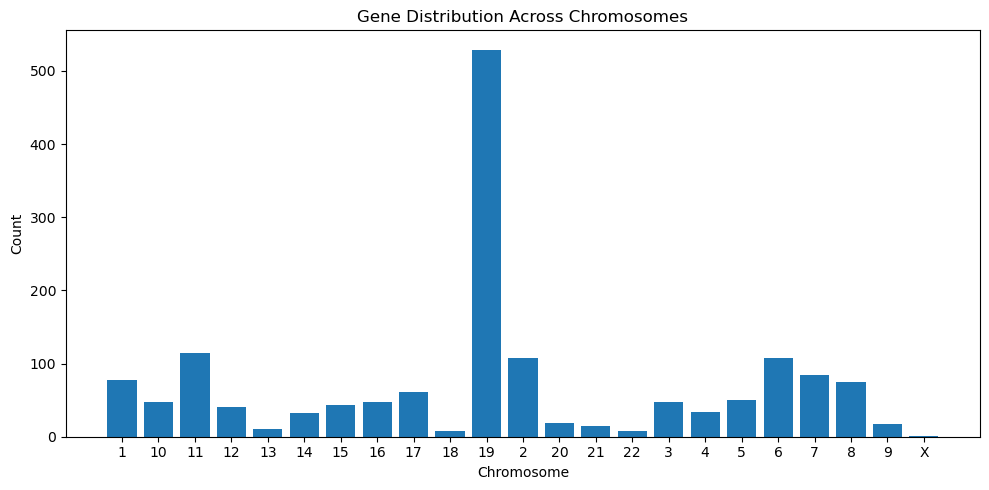

In [82]:
import matplotlib.pyplot as plt

sigs['chr'] = sigs['chr'].astype(str)
chr_counts = sigs['chr'].value_counts().reset_index()
chr_counts.columns = ['chr', 'count']

chr_counts['sort_key'] = chr_counts['chr']
chr_counts = chr_counts.sort_values(by='sort_key')

plt.figure(figsize=(10, 5))
plt.bar(chr_counts['chr'], chr_counts['count'])
plt.xlabel('Chromosome')
plt.ylabel('Count')
plt.title('Gene Distribution Across Chromosomes')
plt.tight_layout()
plt.show()

In [8]:
sigs[['base', 'strange']] = sigs['base'].str.split(',', expand = True) 


KeyError: 'base'

In [74]:
unlinked = {}  # dictionary to hold index: base for unlinked gene

for idx, base in sigs['base'].items():
    too_close = False
    for existing_pos in unlinked.values():
        if sigs['chr'][idx] == existing_pos[0]: # account for chromosomes
            if abs(int(base) - int(existing_pos[1])) < 100000:
                too_close = True
                break
    if not too_close:
        unlinked[idx] = (sigs['chr'][idx], base)

print(len(unlinked))
# account for p-value

606


In [75]:
indexes = list(unlinked.keys())
unlinked_snps = sigs.loc[indexes]

unlinked_snps.head(20)

,riskAllele,pValue,pValueAnnotation,riskFrequency,orValue,beta,ci,mappedGenes,traitName,efoTraits,bgTraits,accessionId,locations,pubmedId,author,chr,base,strange
2688,rs814573-?,0.000000e+00,-,NR,-,-,-,"APOC1,APOC1P1",Alzheimer’s disease polygenic risk score (uppe...,"Alzheimer disease,polygenic risk score",-,GCST90132260,19:44921094,35589863,Gouveia C,19,44921094,None
3035,rs28399637-?,7.000000e-192,-,NR,-,-,-,BCAM,Alzheimer’s disease polygenic risk score (uppe...,"Alzheimer disease,polygenic risk score",-,GCST90132260,19:44820881,35589863,Gouveia C,19,44820881,None
1102,rs6733839-T,6.000000e-118,-,0.3891,1.17,-,[1.16-1.19],"NIFKP9,BIN1",Alzheimer's disease,Alzheimer disease,-,GCST90027158,2:127135234,35379992,Bellenguez C,2,127135234,None
2370,rs261291-?,4.000000e-84,-,NR,-,-,-,ALDH1A2,Alzheimer's disease or HDL levels (pleiotropy),"Alzheimer disease,high density lipoprotein cho...",-,GCST007827,15:58387979,30805717,Zhu Z,15,58387979,None
2620,rs754366-?,4.000000e-71,-,NR,-,-,-,"PPP1R37,MARK4",Alzheimer’s disease polygenic risk score (uppe...,"Alzheimer disease,polygenic risk score",-,GCST90132260,19:45130428,35589863,Gouveia C,19,45130428,None
2717,rs56261258-?,5.000000e-66,-,NR,-,-,-,"PVR,CEACAM16-AS1",Alzheimer’s disease polygenic risk score (uppe...,"Alzheimer disease,polygenic risk score",-,GCST90132260,19:44646342,35589863,Gouveia C,19,44646342,None
3101,rs61812598-G,6.000000e-63,(Interleukin-6 receptor),NR,-,-,-,IL6R,Cerebrospinal fluid levels of Alzheimer's dise...,"Alzheimer disease,interleukin-6 measurement,Al...",-,GCST002665,1:154447611,25340798,Kauwe JS,1,154447611,None
1115,rs3851179-T,3.000000e-48,-,0.3584,0.9,-,[0.89-0.92],"LINC02695,RNU6-560P",Alzheimer's disease,Alzheimer disease,-,GCST90027158,11:86157598,35379992,Bellenguez C,11,86157598,None
1122,rs679515-T,7.000000e-46,-,0.1877,1.13,-,[1.11-1.15],"CR1,CR1-AS1",Alzheimer's disease,Alzheimer disease,-,GCST90027158,1:207577223,35379992,Bellenguez C,1,207577223,None
1130,rs11787077-T,2.000000e-44,-,0.392,0.91,-,[0.9-0.92],CLU,Alzheimer's disease,Alzheimer disease,-,GCST90027158,8:27607795,35379992,Bellenguez C,8,27607795,None


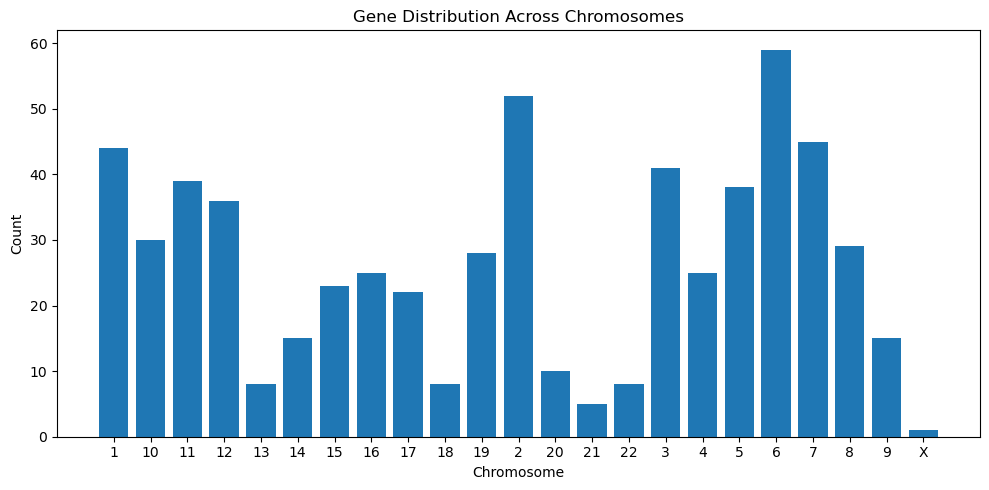

In [84]:
unlinked_snps['chr'] = unlinked_snps['chr'].astype(str)
chr_counts = unlinked_snps['chr'].value_counts().reset_index()
chr_counts.columns = ['chr', 'count']

chr_counts['sort_key'] = chr_counts['chr']
chr_counts = chr_counts.sort_values(by='sort_key')

plt.figure(figsize=(10, 5))
plt.bar(chr_counts['chr'], chr_counts['count'])
plt.xlabel('Chromosome')
plt.ylabel('Count')
plt.title('Gene Distribution Across Chromosomes')
plt.tight_layout()
plt.show()

In [106]:
# extract rs values
snps_df = unlinked_snps[['riskAllele']].copy()
snps_df['snp'] = snps_df['riskAllele'].str.split("-").str[0]

snps = snps_df.drop('riskAllele', axis = 1)
snps.head()

,snp
2688,rs814573
3035,rs28399637
1102,rs6733839
2370,rs261291
2620,rs754366


In [108]:
snps.to_csv('ADsnps.txt', sep = '\t', index = False, header = False)